ML Lab - Exercise sheet 2

Cristina Acevedo 


In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
#Open datasets

store=pd.read_csv('store.csv') #Create store dataframe
train=pd.read_csv('train.csv') #Create train dataframe

C:\Users\crisa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Display store dataset

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
#Display train dataset

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Exercise 1: Exploratory Analysis on Real-World Data using Pandas and Matplotlib 

Part A: (Interesting stats)

In [5]:
#Find the store that has the maximum sale recorded. Print the store id, date and the sales on that day

storewithmaxsale=train[train['Sales']==train['Sales'].max()] #Save the row of store with highest sales
storewithmaxsale=storewithmaxsale.reset_index(drop=True).to_dict() #Put it in a nicer format

answer='The store with the highest sale recorded has id '+ str(storewithmaxsale['Store'][0])+', it was recorded on '+str(storewithmaxsale['Date'][0])+' and the sales were '+str(storewithmaxsale['Sales'][0])+'.'
print(answer)

The store with the highest sale recorded has id 909, it was recorded on 2015-06-22 and the sales were 41551.


In [6]:
#Find the store(s) that has/ve the least possible and maximum possible competition distance(s)

storeswithleastcompetitiondist=store[store['CompetitionDistance']==store['CompetitionDistance'].min()] #Save the row of store with least distance
storeswithleastcompetitiondist=storeswithleastcompetitiondist.reset_index(drop=True).to_dict() #Put it in a nicer format

if len(storeswithleastcompetitiondist['Store'])==1: #Check if there's only one value
    answer='The store with the least competition distance has id '+ str(storeswithleastcompetitiondist['Store'][0])+ ' and the distance is '+str(storeswithleastcompetitiondist['CompetitionDistance'][0])+'.'
    print(answer)

storeswithmaxcompetitiondist=store[store['CompetitionDistance']==store['CompetitionDistance'].max()] #Save the row of store with maximum distance
storeswithmaxcompetitiondist=storeswithmaxcompetitiondist.reset_index(drop=True).to_dict() #Put it in a nicer format

if len(storeswithmaxcompetitiondist['Store'])==1: #Check if there's only one value
    answer='The store with the maximum competition distance has id '+ str(storeswithmaxcompetitiondist['Store'][0])+ ' and the distance is '+str(storeswithmaxcompetitiondist['CompetitionDistance'][0])+'.'
    print(answer)

The store with the least competition distance has id 516 and the distance is 20.0.
The store with the maximum competition distance has id 453 and the distance is 75860.0.


In [7]:
#What has been the maximum timeline a store has ran a "Promo" for? Which store was that, and what dates did the promotion covered?

#storeswithmaxtimeline=store[store.PromoInterval.str.len()==store.PromoInterval.str.len().max()]
#len(storeswithmaxtimeline)


longestpromolen=0 #Start variable
for i in range(1,train['Store'].max()): #Go through stores
    thisdf=train[train['Store']==i] #Get data for just one store
    thisdf=thisdf.sort_values(by=['Date']).reset_index()
    currentlongest=0 #Restart counter when changing store
    for j in range(len(thisdf)-1):
        if thisdf['Promo'][j]==1 and thisdf['Promo'][j+1]==1: #If there is a continuos promo
            currentlongest=currentlongest+1 #Add one to current 
            if currentlongest>longestpromolen: #If current is longer than longest
                #Save data
                longestpromolen=currentlongest
                endofpromo=thisdf['Date'][j+1]
                longestpromostore=thisdf['Store'][j]
                index=j
        elif thisdf['Promo'][j]==1 and thisdf['Promo'][j+1]==0: #If promo ends
            currentlongest=0 #Restart counter
   

datalongeststore=train[train['Store']==longestpromostore]
datalongeststore=datalongeststore.sort_values(by=['Date']).reset_index()

startingday=datalongeststore['Date'][index-longestpromolen]

print('The longest promo ran for '+str(longestpromolen)+' days. It was on store '+str(longestpromostore)+'. It started on '+startingday+' and finished on '+endofpromo+'.')


The longest promo ran for 4 days. It was on store 1. It started on 2013-01-06 and finished on 2013-01-11.


In [8]:
#What is the difference in the mean of sales (across all stores) when offering a Promo and not?

salesonpromo=train[['Promo', 'Sales']].groupby(['Promo']).mean() #Show the mean sales by promo active (1) or not (0)
print(salesonpromo) #Display the data
salesonpromo=salesonpromo.to_dict() #Put it in a nicer format

answer='The difference in mean sales between promo days and not promo days is '+str(abs(salesonpromo['Sales'][0]-salesonpromo['Sales'][1])) #Write the answer
print(answer)

             Sales
Promo             
0      4406.050805
1      7991.152046
The difference in mean sales between promo days and not promo days is 3585.1012408091174


In [9]:
#Are there any anomalies in the data as in where the store was "Open" but had no sales recorded? or vice versa?

isopen = train['Open']==1 #Get boolean vector of open stores
nosales = train['Sales']==0 #Get boolean vector of no sales

anomalie1 = isopen & nosales #Check if both happen at the same time

print('The anomalies when a store is open and there are no sales are: ')
train[anomalie1] #Show the anomalies found

The anomalies when a store is open and there are no sales are: 


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


In [10]:
#or vice versa?

isclosed = train['Open']==0 #Create boolean with closed stores
sales = train['Sales']>0 #Create boolean when they were sales

anomalie2 = isclosed & sales #Check for anomalies when both things happen


if len(train[anomalie2])==0: #If the vector is empty
    print('There were no sales when the stores were closed')

There were no sales when the stores were closed


In [11]:
#Which store type (’a’,’b’ etc.) has had the most sales?

typeastores=store[store['StoreType']=='a']['Store'] #Get all stores of this type 
typebstores=store[store['StoreType']=='b']['Store'] #Get all stores of this type 
typecstores=store[store['StoreType']=='c']['Store'] #Get all stores of this type 
typedstores=store[store['StoreType']=='d']['Store'] #Get all stores of this type 

typeastores.reset_index(drop=True, inplace=True) #Reset index
typebstores.reset_index(drop=True, inplace=True) #Reset index
typecstores.reset_index(drop=True, inplace=True) #Reset index
typedstores.reset_index(drop=True, inplace=True) #Reset index

totalsales=[0,0,0,0] #Create vector to store sales
storetypes=['a','b','c','d'] #Create vector with store names

#Get the sum of sales for each type of store
for i in range(len(typeastores)):
    salesatstore=sum(train[train['Store']==typeastores[i]]['Sales'])
    totalsales[0]+=salesatstore

for i in range(len(typebstores)):
    salesatstore=sum(train[train['Store']==typebstores[i]]['Sales'])
    totalsales[1]+=salesatstore

for i in range(len(typecstores)):
    salesatstore=sum(train[train['Store']==typecstores[i]]['Sales'])
    totalsales[2]+=salesatstore

for i in range(len(typedstores)):
    salesatstore=sum(train[train['Store']==typedstores[i]]['Sales'])
    totalsales[3]+=salesatstore
    
themaximumsales=max(totalsales) #Find maximum sales

thestoretype=storetypes[totalsales==themaximumsales] #Find type of store with maximum sales

answer='The type of store with more sales is '+thestoretype+' with sales of '+str(themaximumsales)+'.' #Write answer
print(answer)


The type of store with more sales is a with sales of 3165334859.


Part B: (Plotting)

C:\Users\crisa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-12-04d1d2e141be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Yearmonth']=dates['Year'].astype(str)+'/'+dates['Month'].astype(str)#join month and year


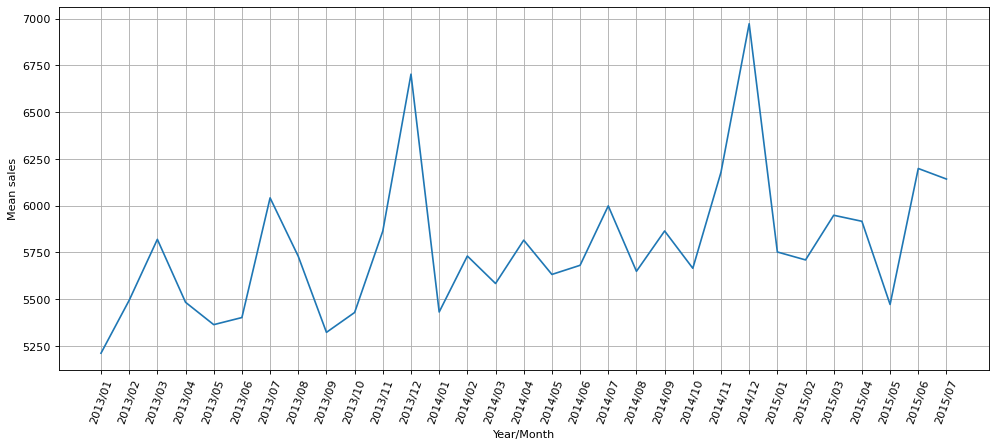

In [12]:
#On a monthly basis how do the mean of sales vary (across all stores)? plot these sale

dates=train[['Date','Sales']] #Pick the data from original set

dates[['Year', 'Month','Day']]= dates['Date'].str.split('-',expand=True) #Separate dates by year, month and day
dates['Yearmonth']=dates['Year'].astype(str)+'/'+dates['Month'].astype(str)#join month and year
salespermonth=dates.groupby(['Yearmonth']).mean() #Get mean sales per month

#Plot
figure(figsize=(15, 6), dpi=80)
plt.plot(salespermonth)
plt.ylabel('Mean sales')
plt.xlabel('Year/Month')
plt.xticks(rotation=70)
plt.grid()
plt.show()


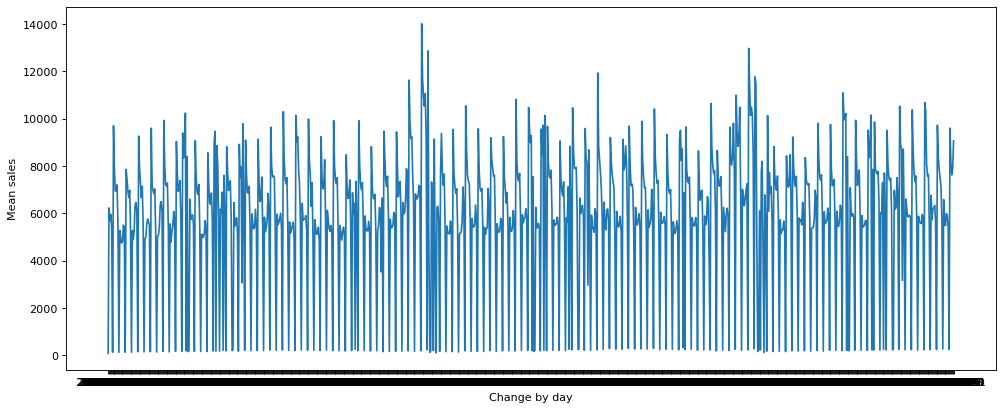

In [13]:
#On a daily basis how do the mean of sales vary (across all stores)? again, plot these sales

#join month and day in a new column

salesperday=dates.groupby(['Date']).mean() #Get mean sales per date

#Plot
figure(figsize=(15, 6), dpi=80)
plt.plot(salesperday)
plt.ylabel('Mean sales')
plt.xlabel('Change by day')
plt.show()


C:\Users\crisa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-14-f35a90dfb89c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firststorefirstyear.sort_values(by=['Day'],inplace=True) #Organize by day
<ipython-input-14-f35a90dfb89c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firststor

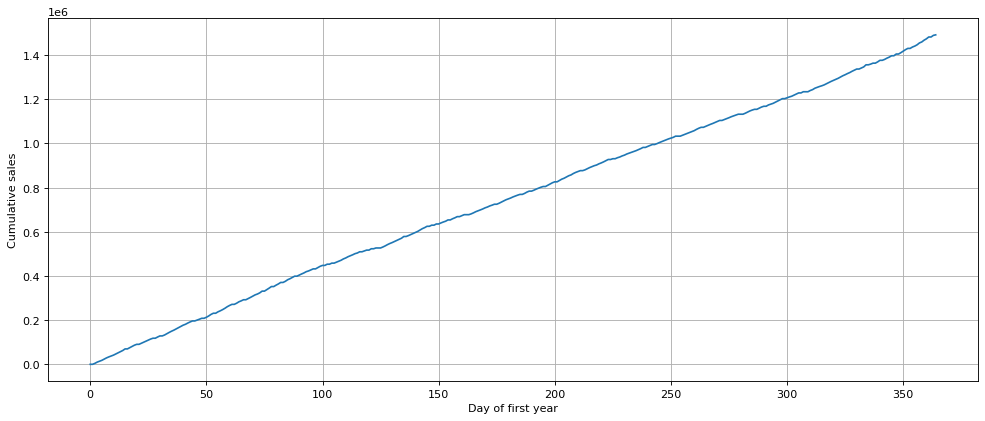

In [14]:
#For the first store id, plot it’s cumulative sales for the first year.

firststore=train[train['Store']==1] #Get first store id
firststore[['Year', 'Month','Day']]=firststore['Date'].str.split('-',expand=True) #Separate date column

firststorefirstyear=firststore[firststore['Year']==min(firststore['Year'])] #Get first year
firststorefirstyear.sort_values(by=['Day'],inplace=True) #Organize by day
firststorefirstyear.sort_values(by=['Month'],inplace=True) #Organize by month

figure(figsize=(15, 6), dpi=80)
plt.plot(range(len(firststorefirstyear)),firststorefirstyear['Sales'].cumsum()) #Plot sumulative sum
plt.ylabel('Cumulative sales')
plt.xlabel('Day of first year')
plt.grid()
plt.show()

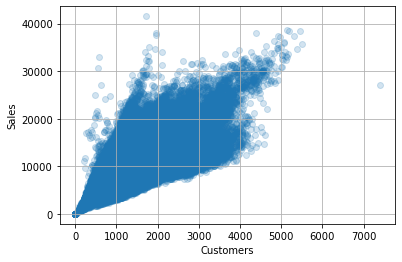

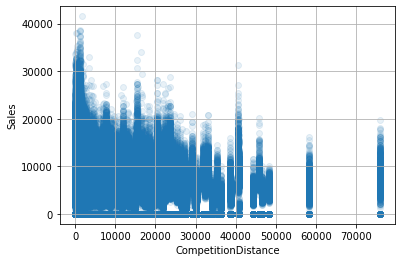

In [15]:
#Plot and comment on the following relationships:
#– customers(x-axis) vs. sales(y-axis)
#– competitiondistance(x-axis) vs. sales(y-axis)

plt.scatter(train['Customers'],train['Sales'], alpha=0.2) #Plot customers vs. sales
plt.ylabel('Sales')
plt.xlabel('Customers')
plt.grid()
plt.show()

fulldata=train.merge(store,left_on='Store', right_on='Store') #join databases

plt.scatter(fulldata['CompetitionDistance'],fulldata['Sales'], alpha=0.1) #Plot competition distance vs. sales
plt.ylabel('Sales')
plt.xlabel('CompetitionDistance')
plt.grid()
plt.show()

#In the first graph we can see that there is a relationship between the number of clients and sales.
#As the number of clients rises, so do sales. This could be because as more customers come in, 
#the store has more chance to increase sales.

#There is also a relationship between the competition distance and sales.
#When the conmpetition distance is less, there seems to be more sales than when competition is far.
#This could be interpreted as the whole space attracting more clients because they know where
#a cluster of stores is and therefore causing more clients to come into this space.

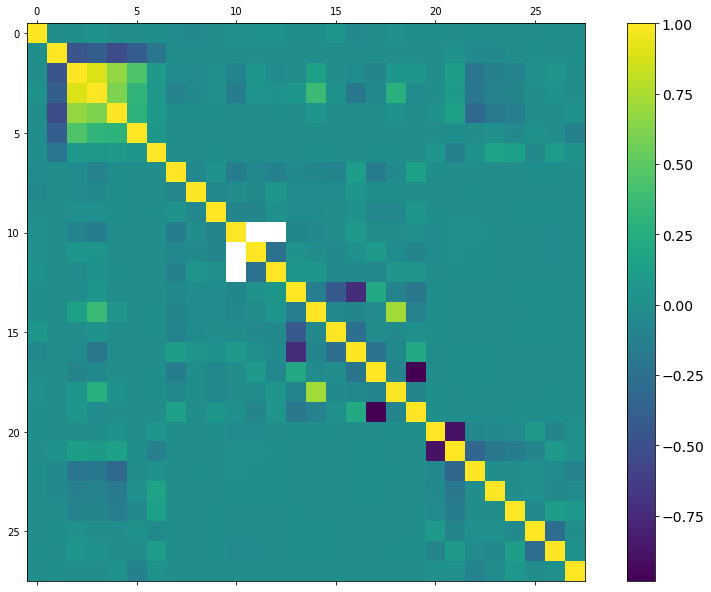

In [16]:
#Plot an array of Pearson correlations between all features. Remember to do the merge operation between the dataframes store and train.

fulldatacoded=pd.get_dummies(fulldata, columns=['StoreType']) #Create dummies for store type
fulldatacoded=pd.get_dummies(fulldatacoded, columns=['Assortment'])#Create dummies for assortment
fulldatacoded=pd.get_dummies(fulldatacoded, columns=['StateHoliday'])#Create dummies for StateHoliday

fulldatacoded[['Year', 'Month','Day']]=fulldatacoded['Date'].str.split('-',expand=True) #Separate date data
fulldatacoded.drop('Date',axis=1,inplace=True) #Drop date column
fulldatacoded.drop('PromoInterval',axis=1,inplace=True) #Drop PromoInterval column as it wont be quantifiable

fulldatacoded=fulldatacoded.astype({'Year': 'int64','Month': 'int64','Day': 'int64'}) #Change variable types

f = plt.figure(figsize=(15, 10))
plt.matshow(fulldatacoded.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

Text(0, 0.5, 'Sales')

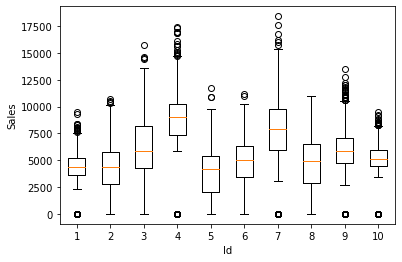

In [17]:
#For the first 10 stores (id’ed) draw boxplots of their sales

salesbystore={} #Initialize variable to plot

for i in range(10): #Go through 10 stores
    salesonstore=train[train['Store']==i+1]['Sales'] #Find sales for each store
    salesbystore[i+1]=salesonstore #Save sales

#Do boxplot by store id
fig, ax = plt.subplots()
ax.boxplot(salesbystore.values())
ax.set_xticklabels(salesbystore.keys())
ax.set_xlabel('Id')
ax.set_ylabel('Sales')

In [18]:
#From the above plot, which store has the highest median sales?

print('Store with id 4 has the highest median sales')

Store with id 4 has the highest median sales


Exercise 2: Linear Regression

Part A: (Implementing Gaussian Elimination)

In [19]:
np.random.seed(10) #Create random seed

In [20]:
#Generate a simple data i.e. a matrix X with dimensions 100×10. Initialize it with normal distribution μ = 2 and σ = 0.01

X=np.random.normal(2,0.01,[100,10])

In [21]:
#Generate a simple target vector i.e. a matrix Y with dimensions 100 ×1. Initialize it with random uniform distribution.

Y=np.random.uniform(0,1,[100,1])

In [22]:
#I didn't quite understand the algorithm given in the exercise sheet, so I worked with this one instead 
#https://www.codesansar.com/numerical-methods/gauss-elimination-method-python-program.htm

def solvelinearsystem(m,y):
    #m is an square matrix (np.dot(x.T,x))
    #y is the solution vector (np.dot(x.T,y))

    a=np.append(m, y, axis=1) #Create extended matrix
    n=len(m) #Get dimension of square matrix

    #gaussian elimination + forward elimination
    for i in range(n):
        if a[i][i] == 0.0:
            return 'Math error' #Exit if diagonal is 0
        for j in range(i+1, n):
            ratio = a[j][i]/a[i][i] #Divide to obtain 1 in the diagonal
            for k in range(n+1):
                a[j][k] = a[j][k] - ratio * a[i][k] #Substract to obtain 0 in the column

    #Back sustitution
    x = np.zeros(n) #Initialize output
    x[n-1] = a[n-1][n]/a[n-1][n-1] #Solve for last equation (easy to solve because of the elimination)

    for i in range(n-2,-1,-1):
        x[i] = a[i][n] #Initial value for x[i]
        for j in range(i+1,n):
            x[i] = x[i] - a[i][j]*x[j] #Solve x[i] by substraction of the other x's multiplied by 
        x[i] = x[i]/a[i][i] #Divide by diagonal
        
    return x
    
    

In [23]:
newcol = np.ones([len(X),1])
Xwithones = np.hstack([X, newcol])

m=np.dot(np.transpose(Xwithones),Xwithones)
y=np.dot(np.transpose(Xwithones),Y)

betas=solvelinearsystem(m,y)

In [24]:
#Implement the corresponding prediction algorithm and calculate the points for each training example in matrix X.

def getpredictions(betas, x_test):
    prediction=np.empty([len(x_test),1]) #Initialize results variable (should have the same shape as Y)
    if len(x_test[0])==len(betas): #Check if input has the correct dimension
        for i in range(len(x_test)):
            for j in range(len(betas)):
                prediction[i]+=betas[len(betas)-j-1]*x_test[i,j]#Calculate y with linear reg equation
    else:
        prediction='error'

    return prediction #Return result
    
Ypredictions=getpredictions(betas, Xwithones)

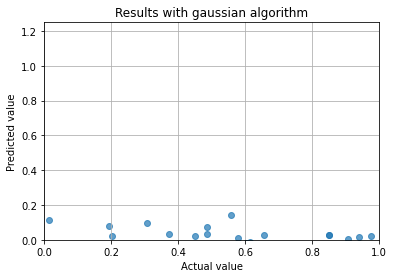

In [25]:
#Plot the training points from matrix Y and predicted values ˆY in the form of scatter graph.

plt.scatter(Y, Ypredictions, alpha=0.7)
plt.ylabel('Predicted value')
plt.xlabel('Actual value')
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.25])
plt.grid()
plt.title('Results with gaussian algorithm')

plt.show()

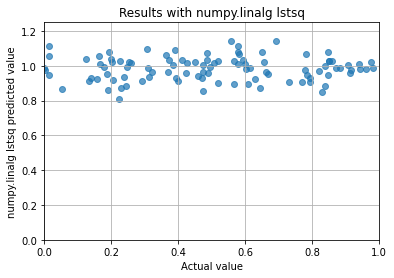

In [26]:
#In the end use numpy.linalg.lstsq to learn β0:10 and plot the predictions from these parameters.

A = np.vstack([X.T, np.ones(len(X))]).T #Stack a ones vector to obtain beta0
npbetas=np.linalg.lstsq(A, Y, rcond=None)[0] #Use function to find betas

Ynppredictions=getpredictions(npbetas, Xwithones)

plt.scatter(Y, Ynppredictions, alpha=0.7)
plt.ylabel('numpy.linalg lstsq predicted value')
plt.xlabel('Actual value')

ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.25])
plt.grid()
plt.title('Results with numpy.linalg lstsq')

plt.show()

Part B: Multiple Linear (Auto)Regression

In [27]:
#Find all the stores that have sales recorded for 942 days  

store, counts=np.unique(train['Store'],return_counts=True) #Count how many times each store is

selectedstores=store[counts>=942] #Find stores that appear at least 942 times
selectedtrain=train[train['Store'].isin(selectedstores)] #Create a new dataframe with selected stores

In [28]:
#Create a data matrix of the shape (#_of_stores, 942) for the daily sales record of these stores. 

data=np.empty([len(selectedstores),942]) #Create empty variable
data.shape

(934, 942)

In [29]:
#Use the first 800 stores in this data matrix for training and the rest for testing. Also split the 
#sales data into 2 parts, the 1st part contains the information about the first 900 days of sales 
#(these would be the features) and the 2nd contains the information about the last 42 days of 
#sales (these would be the targets). 
sortedtrain=train.sort_values(by=['Date']) #Organize database by date
sortedtrain=train.sort_values(by=['Store']) #Organize database by store

reducedtrain=sortedtrain[sortedtrain['Store'].isin(selectedstores)][['Store','Sales','Date']] #Get dataframe with only required data
reduceddata=reducedtrain.pivot_table(columns='Date', index='Store', values='Sales').reset_index() #Pivot to obtain table dataframe
reduceddata=reduceddata.to_numpy() #Transform into array
reduceddata=reduceddata[:,1:] #Delete store column

train=reduceddata[:800,:] #Get first 800 stores
test=reduceddata[800:,:] #Get last stores

x_train=train[:,:900] #Get first 900 days
x_test=test[:,:900] #Get first 900 days

y_train=train[:,900:] #Get last 42 days
y_test=test[:,900:] #Get last 42 days

In [30]:
#Iteratively build multiple linear regression models for column vectors of Ytrain. You are allowed to use the numpy routines for calculating inverses, transposing of matrices and matrix multiplication.

newcol = np.ones([len(x_test),1])
x_test_ones = np.hstack([x_test, newcol]) #Add ones column to x
newcol = np.ones([len(x_train),1])
x_train_ones = np.hstack([x_train, newcol]) #Add ones column to x

m=np.dot(np.transpose(x_train_ones),x_train_ones) #Get x^Tx


for i in range(42):
    y=np.dot(np.transpose(x_train_ones),y_train[:,i:i+1]) #Get x^Ty
    if i==0:
        betas=np.dot(np.linalg.inv(m),y) #Get betas using dot product
    else:
        betas=np.hstack([betas, np.dot(np.linalg.inv(m),y)]) #Get betas using dot product
        

In [31]:
#Verify that you have learned β0:900. Use these learned parameters to make predictions for each day ahead. In total 42 days.

print(betas.shape) #Make sure betas' shape is right

for i in range(42):
    if i==0:
        y_predicted=getpredictions(betas[:,i], x_test_ones) #Create output variable
    else:
        y_predicted=np.hstack([y_predicted, getpredictions(betas[:,i], x_test_ones)]) #Fill with predictions
    print(i) #Watch progress

(901, 42)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


In [32]:
#Calculate and print the daily RMSE and MAE for all 42 sales values using test split (𝑋𝑡𝑒𝑠𝑡 as input). Also calculate and print overall average RMSE and MAE. (i.e. just the mean RMSE of all 42 models). 
for i in range(42):
    substraction=y_predicted[:,i]-y_test[:,i]
    squaresubs=np.square(substraction)
    RMSE=sum(squaresubs)/len(y_predicted[:,0])
    
    abssubs=np.absolute(substraction)
    MAE=sum(abssubs)/len(y_predicted[:,0])
    
    if i==0:
        dailyRMSE=RMSE
        dailyMAE=MAE
    else:
        dailyRMSE=np.vstack([dailyRMSE, RMSE]) #Get betas using dot product
        dailyMAE=np.vstack([dailyMAE, MAE]) #Get betas using dot product

meanRMSE=np.mean(dailyRMSE)
print('The mean RMSE is '+str(meanRMSE))

meanMAE=np.mean(dailyMAE)
print('The mean MAE is '+str(meanMAE))

print('The daily RMSE is: ')
print(dailyRMSE)

print('The daily MAE is: ')
print(dailyMAE)

The mean RMSE is nan
The mean MAE is nan
The daily RMSE is: 
[[           nan]
 [8.59248219e+18]
 [           nan]
 [           nan]
 [           nan]
 [           nan]
 [           nan]
 [1.28526153e+19]
 [9.08704094e+18]
 [           nan]
 [3.39962891e+19]
 [           nan]
 [           nan]
 [           nan]
 [4.11376599e+19]
 [3.68884156e+19]
 [1.15545054e+20]
 [           nan]
 [           nan]
 [           nan]
 [           nan]
 [9.24801159e+19]
 [           nan]
 [8.22366739e+19]
 [           nan]
 [           nan]
 [           nan]
 [2.01471076e+20]
 [           nan]
 [1.04913075e+19]
 [1.74679699e+20]
 [2.87948758e+20]
 [           nan]
 [           nan]
 [2.14235590e+20]
 [1.10564753e+19]
 [3.00243878e+20]
 [           nan]
 [           nan]
 [           nan]
 [4.70398875e+20]
 [7.35314802e+20]]
The daily MAE is: 
[[           nan]
 [2.70249061e+09]
 [           nan]
 [           nan]
 [           nan]
 [           nan]
 [           nan]
 [3.36362652e+09]
 [2.77899882e+09]
 

<ipython-input-32-93a0ae9498c6>:4: RuntimeWarning: overflow encountered in square
  squaresubs=np.square(substraction)


In [33]:
#Compare this approach by reporting the error for the following baselines:

def geterrors(y_predicted,y_test):
    for i in range(42):
        substraction=y_predicted[:,i]-y_test[:,i]
        squaresubs=np.square(substraction)
        RMSE=sum(squaresubs)/len(y_predicted[:,0])
    
        abssubs=np.absolute(substraction)
        MAE=sum(abssubs)/len(y_predicted[:,0])
    
        if i==0:
            dailyRMSE=RMSE
            dailyMAE=MAE
        else:
            dailyRMSE=np.vstack([dailyRMSE, RMSE]) #Get betas using dot product
            dailyMAE=np.vstack([dailyMAE, MAE]) #Get betas using dot product
        
    return [np.mean(dailyRMSE),np.mean(dailyMAE)]

#1. Use the last recorded sales value of each store and repeat it for the next 42 days.
lastvalue=x_test[:,-1] #Get last value for these stores
repeatlastvalue=np.tile(lastvalue, (42,1)) #Transform into matrix

lastdayerrors=geterrors(np.transpose(repeatlastvalue), y_test) #Get errors
print('---------------------------')
print('Using the last recorded sales value the mean RMSE is '+str(lastdayerrors[0])+' and the mean MAE is '+str(lastdayerrors[1])+'.')
print('---------------------------')

#2. Repeat the mean of sales for the sales horizon.
meansales=np.mean(x_train) #Get mean from train data
meansalesmatrix=np.ones([len(y_test),len(y_test[0])])
meansalesmatrix=meansalesmatrix*meansales

meansales=geterrors(meansalesmatrix, y_test)
print('Using the last mean sales value the mean RMSE is '+str(meansales[0])+' and the mean MAE is '+str(meansales[1])+'.')
print('---------------------------')
#3. For each of the 42 days ahead get their predictions as a mean of all sales recorded for that day of week in the past. For e.g. the prediction of Monday ahead should be the mean of all sales for this particular store on all previous Mondays.

dates.sort_values(by=['Date'],inplace=True) #Organize dates
print('First date from training was '+dates['Date'][0]+' which was tuesday.')#Get first date

tuesdays=np.empty([800,])
wednesdays=np.empty([800,])
thursdays=np.empty([800,])
fridays=np.empty([800,])
saturdays=np.empty([800,])
sundays=np.empty([800,])
mondays=np.empty([800,])

for i in range(len(x_train[0])):
    if i%7==0:
        tuesdays=np.vstack([tuesdays,x_train[:,i]])
    elif i%7==1:
        wednesdays=np.vstack([wednesdays,x_train[:,i]])
    elif i%7==2:
        thursdays=np.vstack([thursdays,x_train[:,i]])
    elif i%7==3:
        fridays=np.vstack([fridays,x_train[:,i]])
    elif i%7==4:
        saturdays=np.vstack([saturdays,x_train[:,i]])
    elif i%7==5:
        sundays=np.vstack([sundays,x_train[:,i]])
    elif i%7==6:
        mondays=np.vstack([mondays,x_train[:,i]])

print('First date from test was '+dates['Date'][900]+' which was friday.')#Get first date
meanbyday=[np.nanmean(fridays), np.nanmean(saturdays), np.nanmean(sundays), np.nanmean(mondays), np.nanmean(tuesdays), np.nanmean(wednesdays), np.nanmean(thursdays)] #Start on friday

meanbyday=np.transpose(meanbyday)
repetitions=42/7
days=np.tile(meanbyday,(1,int(repetitions))) #Make predictions for first store by day
meanbydaymatrix=np.tile(days,(134,1)) #Make predictions for all stores

meanday=geterrors(meanbydaymatrix, y_test)
print('Using the mean sales by day of week the mean RMSE is '+str(meanday[0])+' and the mean MAE is '+str(meanday[1])+'.')
print('---------------------------')


---------------------------
Using the last recorded sales value the mean RMSE is 12758344.578891259 and the mean MAE is 2518.8113006396584.
---------------------------
Using the last mean sales value the mean RMSE is 13579754.660156557 and the mean MAE is 2712.763373578533.
---------------------------
First date from training was 2015-07-31 which was tuesday.
First date from test was 2015-07-31 which was friday.
Using the mean sales by day of week the mean RMSE is inf and the mean MAE is 1.0282614382880798e+300.
---------------------------


<ipython-input-33-19c873f24929>:6: RuntimeWarning: overflow encountered in square
  squaresubs=np.square(substraction)


In [34]:
#Reason why or why not Linear Regression is a good choice for this task.

#Linear regression could be a good idea for this problem as there are dynamics that might have a 
#linear relationship; however, for this case the linear regression seems to be a bad option because 
#the training features that were chosen don't describe the sales dynamics very well and other models 
#that are simpler seem to have a better behavior.